In [1]:
import pandas as pd
df = pd.read_csv('Dataset/transactionbydate.csv', sep = ';')
df = df.rename(columns={'sum':'value'})
df = df.set_index('date')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2022-01-01 to 2022-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   365 non-null    int64
dtypes: int64(1)
memory usage: 5.7+ KB


In [19]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
value,365.0,50.126027,16.704461,15.0,38.0,49.0,59.0,119.0


In [3]:
import numpy as np, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

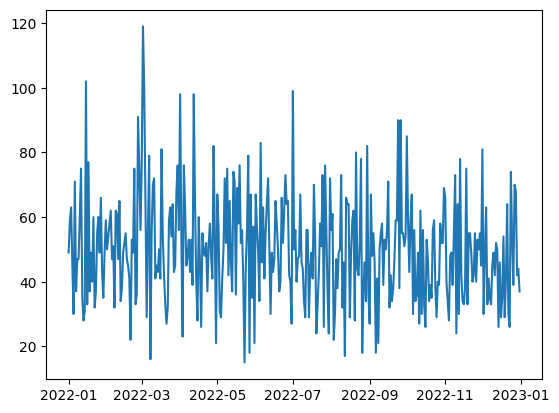

In [4]:
df.index = pd.to_datetime(df.index)
plt.plot(df.index, df['value'])
plt.show()

In [17]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

adf = df['value'] - df['value'].shift(1)

# Menghapus missing value yang muncul akibat differencing
adf.dropna(inplace=True)

# Lakukan uji Dickey-Fuller pada deret waktu stasioner
result = adfuller(adf)

# Cetak hasil uji Dickey-Fuller
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: -12.140087243838845
p-value: 1.658696094176721e-22
Critical Values: {'1%': -3.448853029339765, '5%': -2.869693115704379, '10%': -2.571113512498422}


In [5]:
# split 90% train data and 10% test data
to_row = int(len(df)*0.9)
datatrain = list(df[0:to_row]['value'])
datatest = list(df[to_row:]['value'])

In [6]:
print(len(datatrain))
print(len(datatest))

328
37


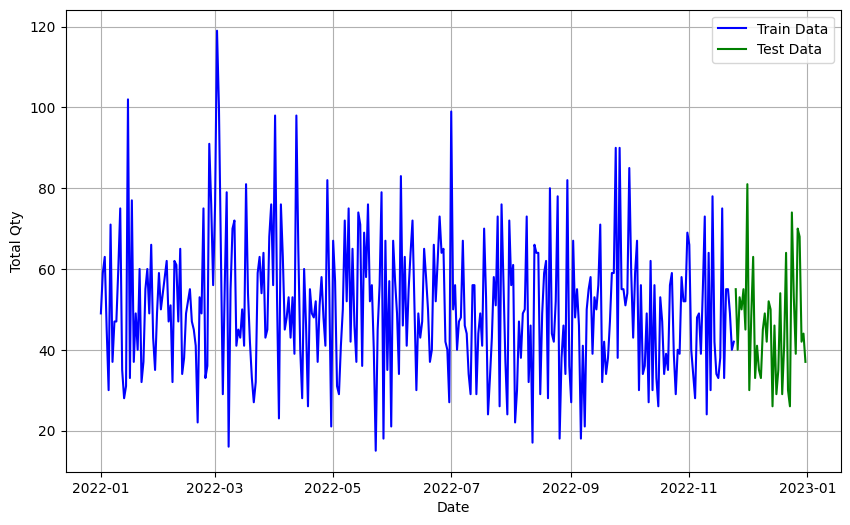

In [7]:
# Plot train and test data

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Total Qty')
plt.plot(df[0:to_row]['value'], 'blue', label = 'Train Data')
plt.plot(df[to_row:]['value'], 'green', label = 'Test Data')
plt.legend()

In [8]:
prediction = []
n_test = len(datatest)

In [9]:
predict_value = []
for i in range(n_test):
    model = ARIMA(datatrain, order = (4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = list(output)[0]
    predict_value.append(yhat)
    actual_value = datatest[i]
    datatrain.append(actual_value)

In [10]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  364
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -1565.766
Date:                Sun, 23 Jul 2023   AIC                           3141.532
Time:                        20:25:16   BIC                           3161.004
Sample:                             0   HQIC                          3149.272
                                - 364                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8407      0.053    -15.745      0.000      -0.945      -0.736
ar.L2         -0.6464      0.063    -10.298      0.000      -0.769      -0.523
ar.L3         -0.4622      0.060     -7.743      0.0

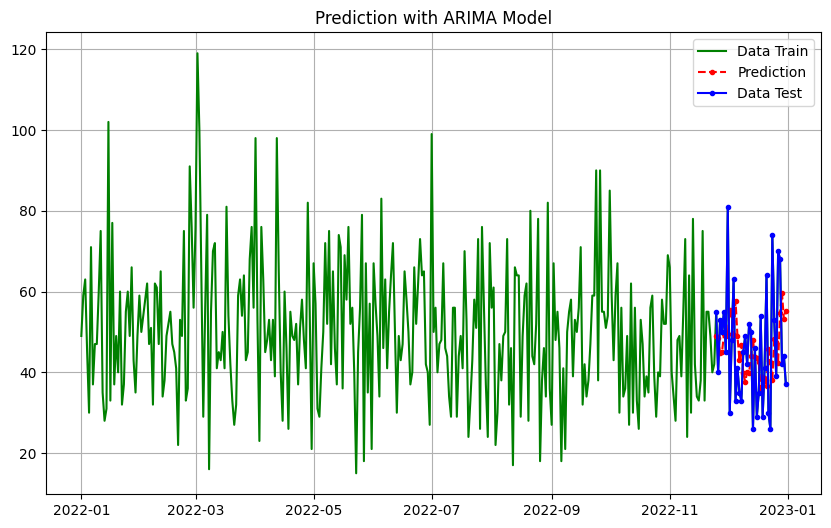

In [14]:
plt.figure(figsize = (10,6))
plt.grid(True)

date_range_train = df.index

plt.plot(date_range_train, datatrain, color='green',  label='Data Train')

date_range_test = df[to_row:].index

plt.plot(date_range_test, predict_value, color = 'red', marker = '.', linestyle = 'dashed', label = 'Prediction')
plt.plot(date_range_test, datatest, color = 'blue', marker = '.', label = 'Data Test')

plt.title('Prediction with ARIMA Model')
plt.legend()
plt.show()

In [16]:
import numpy as np
from sklearn.metrics import r2_score

def mean_absolute_error(actual, forecast):
    return np.mean(np.abs(actual - forecast))

def mean_absolute_percentage_error(actual, forecast):
    return np.mean(np.abs((actual - forecast) / actual)) * 100


mae = mean_absolute_error(datatest, np.array(predict_value))
mape = mean_absolute_percentage_error(datatest, np.array(predict_value))
r2 = r2_score(datatest, np.array(predict_value))

print("MAE:", mae)
print("MAPE:", mape)
print("R2:", r2)

MAE: 12.907036207947588
MAPE: 30.117633740805793
R2: -0.31023374318105645
